In [1]:
def section_1(datafile):
    import numpy as np
    import pandas as pd
    import datetime
    df = pd.read_csv(datafile)
    df["event_time"]=df["event_time"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S UTC"))
    df=df.sort_values(["user_id","event_time"])
    df["previous_user_session"]=df["user_session"].shift()
    df["previous_event_time"]=df["event_time"].shift()
    def duration_to_next_event(row):
        if row["user_session"]!=row["previous_user_session"]:
            return 0
        return row["event_time"]-row["previous_event_time"]
    
    df["duration_to_next_event"] = df.apply(duration_to_next_event, axis=1)
    df=df.sort_index()
    return df

data = section_1("matala2_cosmetics_2019-Nov.csv")

C:\Users\liron firuz\AppData\Local\Temp\ipykernel_3996\937287082.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datafile)


In [2]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,previous_user_session,previous_event_time,duration_to_next_event
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,8aeeeb12-670b-489e-977d-ea00f6c9c46b,2019-11-02 00:01:48,0
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,c2ef83d9-7a36-4830-aa38-30bf4c0742f2,2019-11-20 08:46:53,0
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,6c84aa81-021c-48f1-8d9f-da48e2bd984d,2019-11-10 16:47:15,0
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,74911014-31fd-4a26-b9fd-da79f98ddaf9,2019-11-12 08:09:20,0
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:09,0 days 00:00:15
...,...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,ee50b160-a4db-4722-8751-6812c5b38295,2019-11-30 23:58:15,0 days 00:01:31
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,dd6d8240-0896-4965-9344-110648581a51,2019-11-30 23:59:37,0
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,45236dc4-bc1c-4c74-84f3-6d67733465ed,2019-11-17 13:35:26,0
4635835,2019-11-30 23:59:57,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,77d2f8e5-3d99-4abc-a90d-4efa938bdaed,2019-11-30 07:05:12,0


In [24]:
def section_2_3(datafile):
    import numpy as np
    import pandas as pd
    import datetime
    from datetime import date, timedelta
    df = pd.read_csv(datafile)
    df["event_time"]=df["event_time"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S UTC"))
    df=df.sort_values(["user_id","event_time"])
    df["previous_event_time"]=df["event_time"].shift()
    df["previous_user_id"]=df["user_id"].shift()
    def more_then_5days(row):
        counter = 0
        if (row["user_id"]==row["previous_user_id"]):
            if (row["event_time"]-row["previous_event_time"])<timedelta(days=5):
                return counter
            elif (row["event_time"]-row["previous_event_time"])>timedelta(days=5):
                counter = counter+1
                return counter
        return counter
    
    df["more_then_5days"] = df.apply(more_then_5days, axis=1)
    df["more_then_5days"] = df["more_then_5days"].cumsum()
    df["previous_more_then_5days"] = df["more_then_5days"].shift()
    def funnel_number(row):
        funnel = 1
        if (row["user_id"]==row["previous_user_id"]):
            if (row["more_then_5days"]==row["previous_more_then_5days"]):
                return funnel
            funnel = funnel +1
            return funnel
        return funnel
    
    df["funnel_number"] = df.apply(funnel_number, axis=1)
    def index_in_funnel(row):
        index = 1
        if (row["user_id"]==row["previous_user_id"]):
            if (row["event_time"]-row["previous_event_time"])==timedelta(days=0):
                return index
            index = index+1 
            return index
        return index
    df["index_in_funnel"] = df.apply(index_in_funnel, axis=1)
    return df

data = section_2_3("matala2_cosmetics_2019-Nov.csv")

C:\Users\liron firuz\AppData\Local\Temp\ipykernel_3996\3210855720.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datafile)


In [25]:
a= data[["event_time","previous_event_time","user_id","previous_user_id","more_then_5days","previous_more_then_5days","funnel_number","index_in_funnel"]]
a

,event_time,previous_event_time,user_id,previous_user_id,more_then_5days,previous_more_then_5days,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,NaT,1120748,NaN,0,NaN,1,1
2483241,2019-11-19 09:56:09,2019-11-04 15:28:57,1458813,1120748.0,0,0.0,1,1
2494623,2019-11-19 11:14:48,2019-11-19 09:56:09,1458813,1458813.0,0,0.0,1,2
2640971,2019-11-20 11:58:06,2019-11-19 11:14:48,1458813,1458813.0,0,0.0,1,2
2641003,2019-11-20 11:58:27,2019-11-20 11:58:06,1458813,1458813.0,0,0.0,1,2
...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14,2019-11-30 23:56:00,579968623,579968623.0,48090,48090.0,1,2
4635736,2019-11-30 23:56:17,2019-11-30 23:56:14,579968623,579968623.0,48090,48090.0,1,2
4635737,2019-11-30 23:56:21,2019-11-30 23:56:17,579968623,579968623.0,48090,48090.0,1,2
4635752,2019-11-30 23:56:46,2019-11-30 23:56:21,579968937,579968623.0,48090,48090.0,1,1


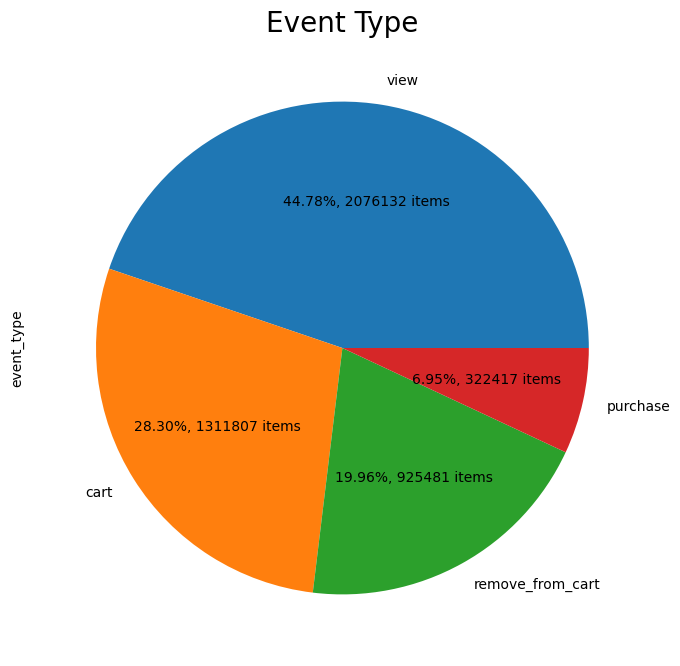

In [65]:
import matplotlib.pyplot as plt
values=data['event_type'].value_counts()
plt.figure(1, figsize=(8,8))
plt.title("Event Type",size=(20))
data['event_type'].value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f} items')
plt.show()

In [62]:

def view(row):
    if row["event_type"]=="view":
        return row["product_id"]
def cart(row):
    if row["event_type"]=="cart":
        return row["product_id"]
def purchase(row):
    if row["event_type"]=="purchase":
        return row["product_id"]

data["items_view"]=data.apply(view, axis=1)
data["items_cart"]=data.apply(cart, axis=1)
data["items_purchase"]=data.apply(purchase, axis=1)
data["previous_user_session"]=data["user_session"].shift()
data["only_date"]= data["event_time"].apply(lambda x:x.date())
data['same_date?'] = data[["user_id","only_date"]].groupby(["user_id"]).transform('count')
data["prouduct"] = data[["event_type","user_id"]].groupby(["user_id"]).transform('count')

session_data = data.groupby(["user_session"]).agg(
{
    "user_id": lambda x: x,
    "funnel_number" :lambda x: x,
    "index_in_funnel": lambda x: x,
    "same_date?": "last",
    "items_view": lambda x: list(x),
    "items_cart": lambda x: list(x),
    "items_purchase": lambda x: list(x)
    
}).reset_index()

In [63]:
session_data.columns = ["User_session","User_id","funnel_number","index_in_funnel","num_of_events_in_session","list_of_viewed","list_of_added_to_cart","list_of_purchased"]
session_data


,User_session,User_id,funnel_number,index_in_funnel,num_of_events_in_session,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,[5829298.0],[nan],[nan]
1,00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,2,[5771614.0],[nan],[nan]
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,1,[5568472.0],[nan],[nan]
3,00004c7d-9507-474e-a559-0fdaccaaa390,504468592,1,2,414,[5864850.0],[nan],[nan]
4,0000597b-de39-4a77-9fe5-02c8792ca14e,"[571211128, 571211128, 571211128]","[1, 1, 1]","[2, 2, 2]",4,"[5861620.0, 5861619.0, 5861591.0]","[nan, nan, nan]","[nan, nan, nan]"
...,...,...,...,...,...,...,...,...
942017,ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,1,[5790563.0],[nan],[nan]
942018,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,"[577542926, 577542926]","[1, 1]","[1, 2]",3,"[5588154.0, 5676246.0]","[nan, nan]","[nan, nan]"
942019,ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,2,12,[5847328.0],[nan],[nan]
942020,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,566764549,1,1,1,[5528034.0],[nan],[nan]
